<a href="https://colab.research.google.com/github/Gk787/DS-Project/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
data = transactions.merge(customers, on='CustomerID', how='left')

In [ ]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count',
    'Region': 'first'
}).reset_index()

In [ ]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [ ]:
db_scores = {}
clusters_range = range(2, 11)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores[k] = db_index

In [ ]:
optimal_clusters = min(db_scores, key=db_scores.get)
optimal_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
optimal_labels = optimal_kmeans.fit_predict(scaled_features)

In [ ]:
customer_features['Cluster'] = optimal_labels

In [ ]:
optimal_db_index = db_scores[optimal_clusters]

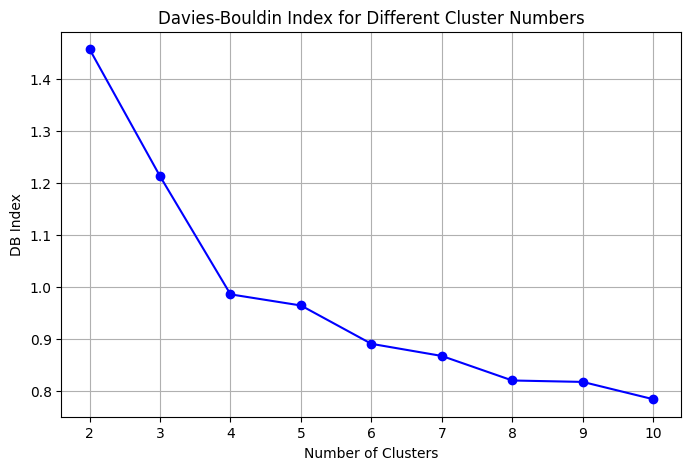

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(db_scores.keys()), list(db_scores.values()), marker='o', color='b')
plt.title("Davies-Bouldin Index for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.grid(True)
plt.show()

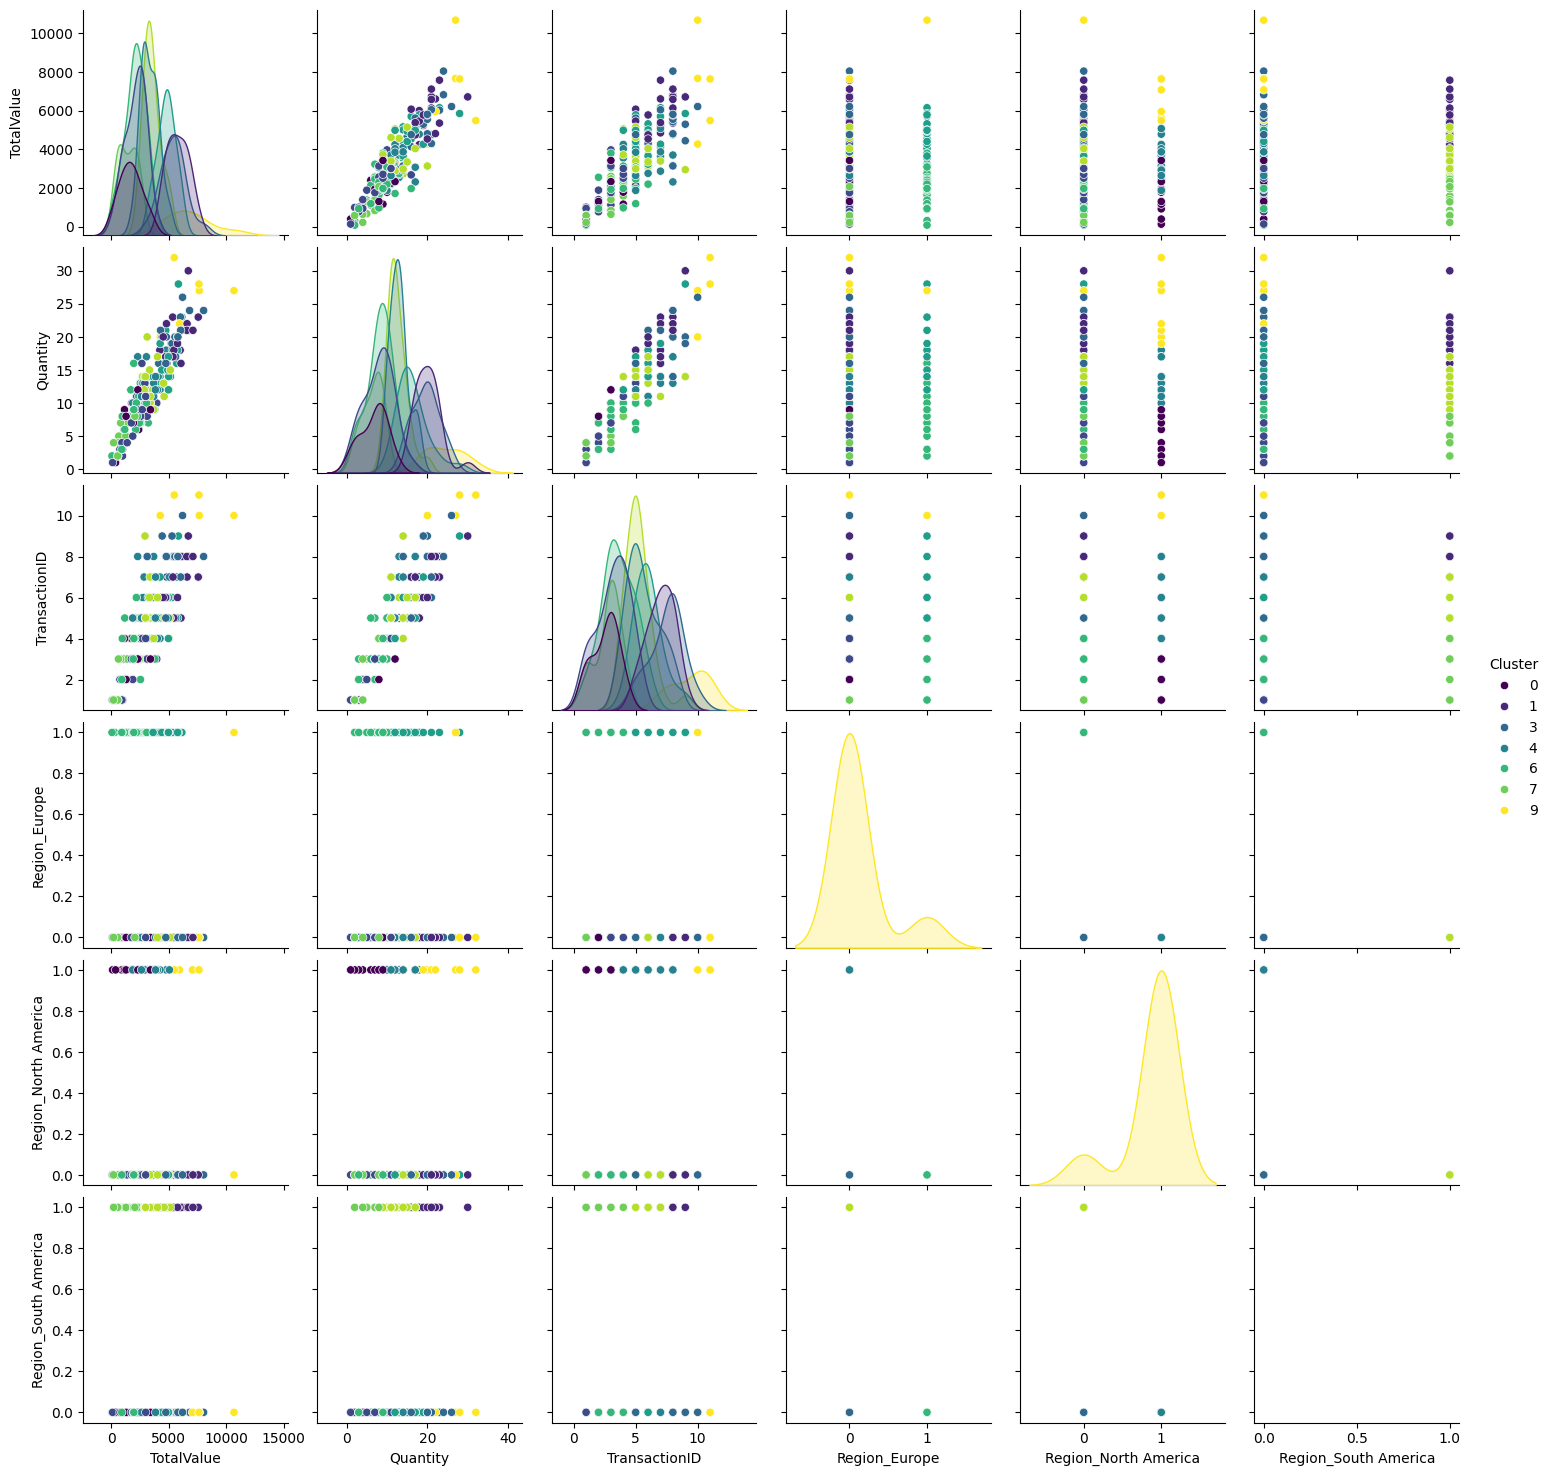

In [ ]:
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

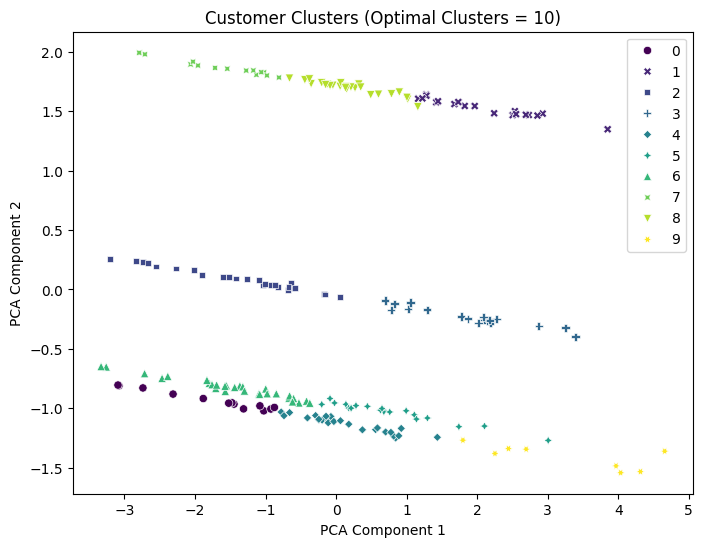

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    hue=optimal_labels,
    palette='viridis',
    style=optimal_labels,
    legend='full'
)
plt.title(f"Customer Clusters (Optimal Clusters = {optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
import os
os.makedirs('/mnt/data', exist_ok=True)
customer_features[['CustomerID', 'Cluster']].to_csv('/mnt/data/Customer_Segments.csv', index=False)

In [ ]:
print("Customer segmentation completed successfully!")
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for Optimal Clusters: {optimal_db_index}")

Customer segmentation completed successfully!
Optimal Number of Clusters: 10
Davies-Bouldin Index for Optimal Clusters: 0.7848748526738405
